In [1]:
# Imports and plotting setups
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

import sys, os
sys.path.insert(0, '../../')
sys.path.insert(0, '../')

import math_funcs

from cycler import cycler

default_cycler = (cycler(color=['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', 'black']) +
                cycler(linestyle=['-', '--', ':', '-.', '-', '--', ':']))

plt.rc('lines', linewidth=1)
plt.rc('axes', prop_cycle=default_cycler)

plt.rcParams["font.family"] = "Times"
plt.rcParams["font.size"] = 8

plt.rcParams['figure.figsize'] = (3.5, 2.5)
plt.rcParams['figure.dpi'] = 200

#plt.rcParams['text.usetex'] = True

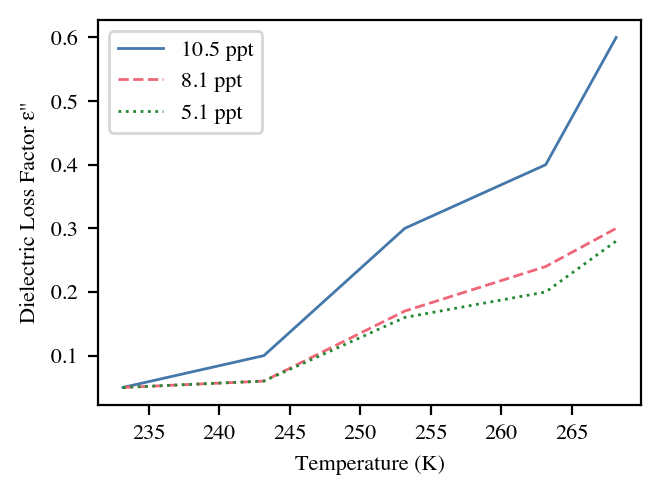

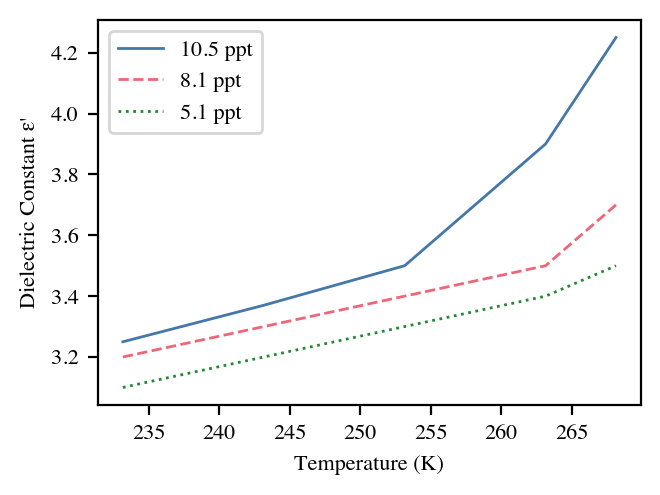

In [3]:
# Values from Vant 1976 PhD Thesis, and read from graph in Hallikainen 1992
temperatures_fy = 273.15 + np.array([-40, -30, -20, -10, -5])
fy_ice_10p5ppt_lf = [0.05, 0.1, 0.3, 0.4, 0.6]
fy_ice_8p1ppt_lf = [0.05, 0.06, 0.17, 0.24, 0.3]
fy_ice_5p1ppt_lf = [0.05, 0.06, 0.16, 0.2, 0.28]

fy_ice_10p5ppt_dk = [3.25, 3.37, 3.5, 3.9, 4.25]
fy_ice_8p1ppt_dk = [3.2, 3.3, 3.4, 3.5, 3.7]
fy_ice_5p1ppt_dk = [3.1, 3.2, 3.3, 3.4, 3.5]

fig = plt.figure()

plt.plot(temperatures_fy, fy_ice_10p5ppt_lf, label='10.5 ppt')
plt.plot(temperatures_fy, fy_ice_8p1ppt_lf, label='8.1 ppt')
plt.plot(temperatures_fy, fy_ice_5p1ppt_lf, label='5.1 ppt')

plt.legend()

plt.xlabel('Temperature (K)')
plt.ylabel('Dielectric Loss Factor ε\'\'')
plt.show()

fig = plt.figure()

plt.plot(temperatures_fy, fy_ice_10p5ppt_dk, label='10.5 ppt')
plt.plot(temperatures_fy, fy_ice_8p1ppt_dk, label='8.1 ppt')
plt.plot(temperatures_fy, fy_ice_5p1ppt_dk, label='5.1 ppt')

plt.legend()

plt.xlabel('Temperature (K)')
plt.ylabel('Dielectric Constant ε\'')
plt.show()

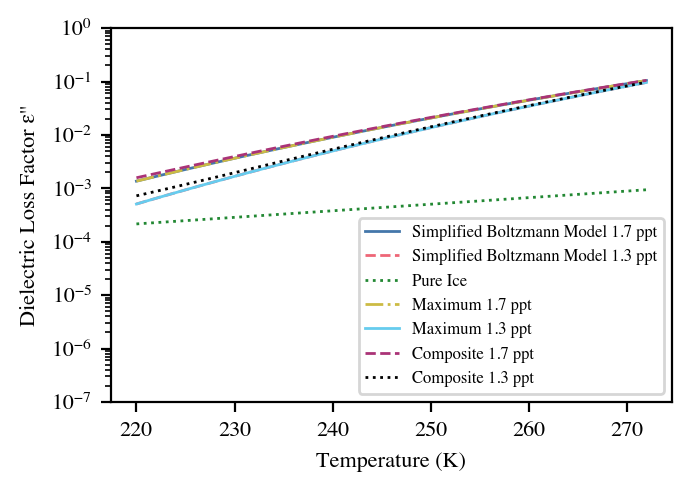

In [6]:
# Boltzmann model of the conductivity change over temperature
temp_act_energy = np.arange(220, 273, 1)
boltzmann_model = lambda ae, t_0, conductivity_0, t: \
    conductivity_0 * np.e**(
        (ae * scipy.constants.electron_volt / scipy.constants.Boltzmann) \
    * (1 / (t_0) - (1 / (t))))
conductivity_loss_1p7ppt = boltzmann_model(0.43, #eV
    273.15 - 5, 0.08, temp_act_energy)
conductivity_loss_1p3ppt = boltzmann_model(0.52, #eV
    273.15 - 5, 0.07, temp_act_energy)

# Matlzer and Wegmuller
pure_ice_loss_factor = 10**(-3.0129 + 0.0123 * (temp_act_energy - 273.15))

plt.plot(temp_act_energy, conductivity_loss_1p7ppt, label='Simplified Boltzmann Model 1.7 ppt')
plt.plot(temp_act_energy, conductivity_loss_1p3ppt, label='Simplified Boltzmann Model 1.3 ppt')
plt.plot(temp_act_energy, pure_ice_loss_factor, label='Pure Ice')
plt.plot(temp_act_energy, np.maximum(pure_ice_loss_factor, conductivity_loss_1p7ppt), label='Maximum 1.7 ppt')
plt.plot(temp_act_energy, np.maximum(pure_ice_loss_factor, conductivity_loss_1p3ppt), label='Maximum 1.3 ppt')
plt.plot(temp_act_energy, pure_ice_loss_factor + conductivity_loss_1p7ppt, label='Composite 1.7 ppt')
plt.plot(temp_act_energy, pure_ice_loss_factor + conductivity_loss_1p3ppt, label='Composite 1.3 ppt')
plt.xlabel('Temperature (K)')
plt.ylabel('Dielectric Loss Factor ε\'\'')
plt.yscale('log')
plt.ylim(10**-7, 1)
plt.legend(fontsize=6)
plt.tight_layout()
plt.show()